In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [2]:
def moving_average_v1(a, n=3):
    # both methods are from: 
    # https://stackoverflow.com/questions/14313510/how-to-calculate-moving-average-using-numpy
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n
    
def moving_average_v2(a, n=3):
    return np.convolve(a, np.ones(n), 'valid') / n

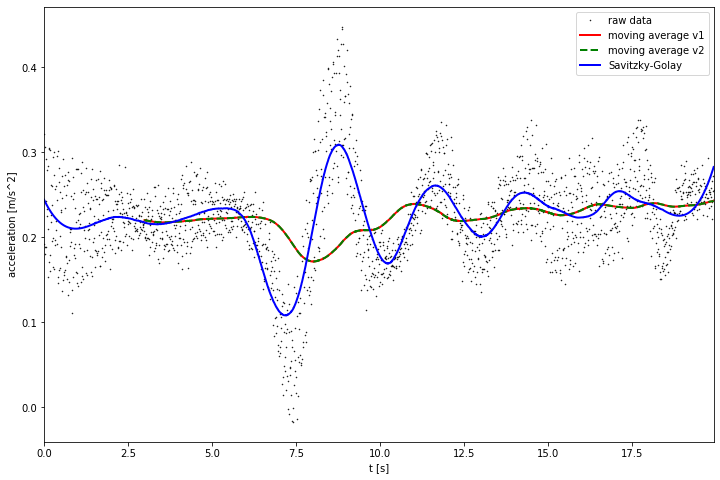

In [4]:
filename = 'ship_vibration.csv'

data = np.loadtxt(filename,delimiter='\t',skiprows=1)

crop=2000
t = data[:crop,0]
y = data[:crop,2]

w = 301

y_mavg1 = moving_average_v1(y,w)
y_mavg2 = moving_average_v2(y,w)

# from
# https://stackoverflow.com/questions/20618804/how-to-smooth-a-curve-in-the-right-way
# https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter
order = 3
y_savgol = savgol_filter(y, w, order)

fig = plt.figure(figsize=(12,8))
plt.plot(t,y,'.k',markersize=1,label='raw data')
plt.plot(t[(w-1):],y_mavg1,'-r',lw=2,label='moving average v1')
plt.plot(t[(w-1):],y_mavg2,'--g',lw=2,label='moving average v2')
plt.plot(t,y_savgol,'-b',lw=2,label='Savitzky-Golay')
plt.xlim([t[0],t[-1]])
plt.xlabel('t [s]')
plt.ylabel('acceleration [m/s^2]')
plt.legend()
# plt.savefig('smoothing.png',dpi=200,format='png')
plt.show()